<a href="https://colab.research.google.com/github/jaeyeon1234/hondl/blob/main/hondeeplearning_01_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#LeNet-5 모델 만들기
import keras
from keras import layers

lenet5 = keras.Sequential()  #Sequential() 클래스 객체 생성
lenet5.add(layers.Input(shape=(28,28,1))) #Input 함수를 이용해 입력(컬러이미지)의 크기 지정
lenet5.add(layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid',
                         padding='same'))
                        #첫번째 합성곱층 추가
                        #필터 개수 6개, 커널 크기 5, 활성화 함수로 시그모이드 함수 사용.
                        #padding 파라미터를 same으로 지정해 입력과 특성 맵의 크기 동일하게 함

lenet5.add(layers.AveragePooling2D(pool_size=2)) #크기가 2인 평균 풀링층 추가
lenet5.add(layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'))  #두번째 합성곱층 추가. 필터개수 16개, 커널 크기 5, 시그모이드함수사용
lenet5.add(layers.AveragePooling2D(pool_size=2)) #두번째 평균풀링층 추가

lenet5.add(layers.Flatten()) #3차원 특성 맵 1차원으로 펼침
lenet5.add(layers.Dense(120, activation='sigmoid'))  #120개 유닛 가진 첫번째 밀집층 추가
lenet5.add(layers.Dense(84, activation='sigmoid'))   #83개 유닛 가진 두번째 밀집층 추가
lenet5.add(layers.Dense(10, activation='softmax'))   #10개 유닛 가진 첫번째 밀집층 추가. 이 층이 출력층

In [3]:
#만든 LeNet-5 모델 구조 확인
lenet5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# 패션MNIST 데이터셋 준비하기
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
print(train_target)

[9 0 0 ... 3 0 5]


In [6]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


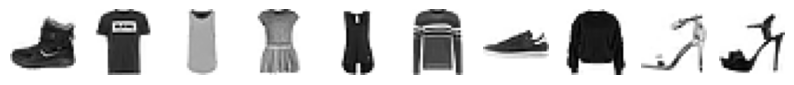

In [9]:
# 맷플롯립 라이브러리 사용하여 그림으로 데이터 샘플 출력
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [10]:
#train_input에 마지막 차원 추가해야함!(첫번째 합성곱층에서 (28,28,1)로 지정햇으니까)
train_input = train_input.reshape(-1,28,28,1)/255.0

In [11]:
#검증 세트 만들기(사이킷런의 train_test_split 함수 사용)
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [12]:
#모델 훈련하기_콜백 정의
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'lenet5-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [13]:
#손실 값 추가... 아 시발 개힘드네
lenet5.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
#ㄹㅇ 찐 모델 훈련 ㄷㄱ
hist = lenet5.fit(train_scaled, train_target, epochs=20,
                  validation_data=(val_scaled, val_target),
                  callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.3807 - loss: 1.6599 - val_accuracy: 0.7151 - val_loss: 0.7243
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.7320 - loss: 0.6884 - val_accuracy: 0.7630 - val_loss: 0.6099
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.7661 - loss: 0.5956 - val_accuracy: 0.7971 - val_loss: 0.5490
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.8049 - loss: 0.5142 - val_accuracy: 0.7990 - val_loss: 0.5012
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.8220 - loss: 0.4744 - val_accuracy: 0.8324 - val_loss: 0.4513
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.8338 - loss: 0.4500 - val_accuracy: 0.8368 - val_loss: 0.4305
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.8415 - loss: 0.4244 - val_accuracy: 0.8490 - val_loss: 0.4199
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.8496 -

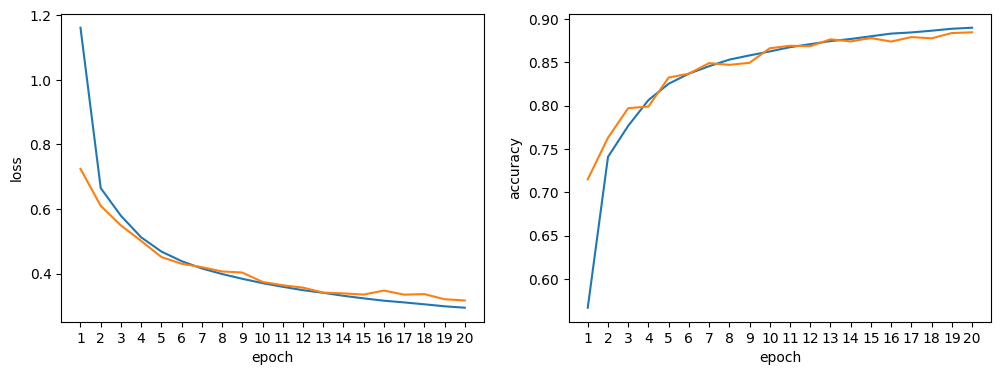

In [15]:
#모델 성능 확인하기
epochs = range(1, len(hist.history['loss'])+1)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(epochs, hist.history['loss'])
axs[0].plot(epochs, hist.history['val_loss'])
axs[0].set_xticks(epochs)
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[1].plot(epochs, hist.history['accuracy'])
axs[1].plot(epochs, hist.history['val_accuracy'])
axs[1].set_xticks(epochs)
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
plt.show()